## Bayes’ Theorem 

Obtain the posterior possibility from the prior, through the formula <br>
> $P(C|x) = P(x|C) * P(C) / P(x)$

When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a Gaussian distribution.<br>
The prior possibilities can be estimated from Gaussian distribution parameterized by the mean and variance of each class.
> $P(x|C) \sim e^{(x-\overline{x})/{2\sigma^2}}$

$\overline{x}$ and $\sigma^2$ are the mean and variance of x in class C. For multi-feature case, <br>
> $P(C|x) = P(C)P(x_1|C)P(x_2|C)...P(x_n|C)/P(x).$

For a given testing dataset, calculate the posterior possibility of each class, assign this dataset to the class with largest posterior possibility.


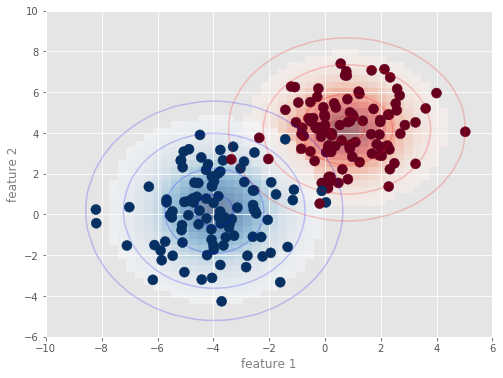

In [22]:
from sklearn.datasets import make_blobs
plt.style.use('ggplot')
X, y = make_blobs(200, 2, centers=2, random_state=3, cluster_std=1.5)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('feature 1', color='gray')
ax.set_ylabel('feature 2', color='gray')
ax.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.RdBu)
    
xlim = (-10, 6)
ylim = (-6, 10)

xg = np.linspace(xlim[0], xlim[1], 50)
yg = np.linspace(ylim[0], ylim[1], 50)
xx, yy = np.meshgrid(xg, yg)
zz = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (zz - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)


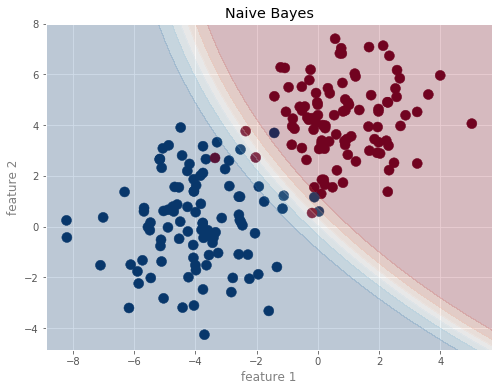

In [24]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.naive_bayes import GaussianNB
plt.style.use('ggplot')

def plot_nb(t):
    X, y = make_blobs(n_samples=200, centers=2,
                  random_state=3, cluster_std=1.50)
    
    clf = GaussianNB()
    clf.fit(X, y)

    ax.set_title(t)
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.RdBu)
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 100)
    y = np.linspace(ylim[0], ylim[1], 100)
    yy, xx = np.meshgrid(y, x)
    xy = np.vstack([xx.ravel(), yy.ravel()]).T

    zz = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    zz = zz.reshape(xx.shape)
    ax.contourf(xx, yy, zz, cmap=plt.cm.RdBu, alpha=0.2)
    
    
fig, ax = plt.subplots(figsize=(8, 6))
plot_nb('Naive Bayes')